In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# import dataset
dataset = pd.read_csv('./data/train.csv')

dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# get features into X
X = (dataset.iloc[:, 1:]).astype('float32')
X = X.values.reshape(X.shape[0], 28, 28, 1)
X.shape

(42000, 28, 28, 1)

In [4]:
# get labels into y
y = (dataset.iloc[:, 0]).astype('int32')
y = np_utils.to_categorical(y)
y.shape

(42000, 10)

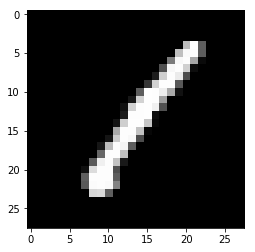

In [5]:
# example image
plt.imshow(X[0].reshape(28, 28), cmap=plt.get_cmap('gray'))

In [6]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

X_train.shape, X_test.shape

((37800, 28, 28, 1), (4200, 28, 28, 1))

In [7]:
# Building the Convnet

# ** Model Start **
model = Sequential()

model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(1000, activation='relu'))

model.add(Dense(10, activation='softmax'))
# ** Model Ends **

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              513000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total para

In [8]:
# compile the model
model.compile(
            loss='categorical_crossentropy',
            optimizer='rmsprop',
            metrics=['accuracy'])

In [9]:
# train image generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# test image generator
test_datagen = ImageDataGenerator(
    rescale=1./255)

In [10]:
# train batch
batches = train_datagen.flow(X_train, y_train,  batch_size=64)

# validation batch
validation_batches = test_datagen.flow(X_test, y_test,  batch_size=64)

In [11]:
# train the model
model.fit_generator(
    batches,
    epochs=30,
    validation_data=validation_batches)

Epoch 1/30
591/591 [==============================] - 34s 57ms/step - loss: 0.3996 - acc: 0.8709 - val_loss: 0.1375 - val_acc: 0.9567
Epoch 2/30
591/591 [==============================] - 25s 43ms/step - loss: 0.1574 - acc: 0.9513 - val_loss: 0.0868 - val_acc: 0.9714
Epoch 3/30
591/591 [==============================] - 26s 44ms/step - loss: 0.1223 - acc: 0.9627 - val_loss: 0.0767 - val_acc: 0.9748
Epoch 4/30
591/591 [==============================] - 25s 42ms/step - loss: 0.1062 - acc: 0.9685 - val_loss: 0.0614 - val_acc: 0.9829
Epoch 5/30
591/591 [==============================] - 25s 42ms/step - loss: 0.0987 - acc: 0.9710 - val_loss: 0.0749 - val_acc: 0.9783
Epoch 6/30
591/591 [==============================] - 25s 43ms/step - loss: 0.0906 - acc: 0.9733 - val_loss: 0.0655 - val_acc: 0.9800
Epoch 7/30
591/591 [==============================] - 25s 42ms/step - loss: 0.0882 - acc: 0.9753 - val_loss: 0.0543 - val_acc: 0.9850
Epoch 8/30
591/591 [==============================] - 26s 44ms

In [12]:
# save the model
model.save('mnist_convnet.h5')